<a href="https://colab.research.google.com/github/Dharvi-k/Pytorch_Workflow/blob/main/COMPUTER_VISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# COMPUTER VISION

---



In [120]:
# Importing dependencies

# import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib fro visulization
import matplotlib.pyplot as plt


# 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset


We're going to start with FashionMNIST.

FashionMNIST, made by Zalando Research, it contains grayscale images of 10 different kinds of clothing

***To download it, we provide the following parameters: ***

root: str - which folder do you want to download the data to?

train: Bool - do you want the training or test split?

download: Bool - should the data be downloaded?

transform: torchvision.transforms - what transformations would you like to do on the data?

target_transform - you can transform the targets (labels) if you like too.


In [121]:
# set up training data
train_data=datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # where to download data to?
    download=True, # where to download data to?
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well

)

# Set up testing data
test_data=datasets.FashionMNIST(
    root="data",
    train=False,  # get test data
    download=True,
    transform=ToTensor()
)

**Let's see how our training data looks like**

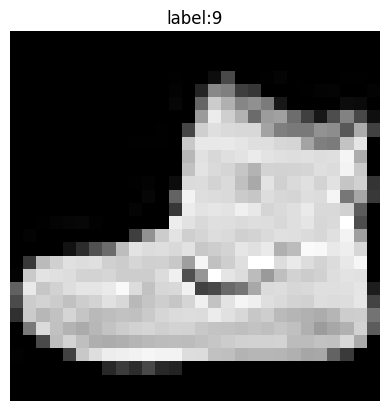

In [122]:
image,label=train_data[0]  # Get first image-label pair
plt.imshow(image.squeeze(),cmap="gray")
plt.title(f"label:{label}")
plt.axis("off")
plt.show()


In [123]:
# SEE CLASSES
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [124]:
# See first training sample
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

**1.1 Input and output shapes of a computer vision model**

In [125]:

# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

Having color_channels=1 means the image is grayscale.

If color_channels=3, the image comes in pixel values for red, green and blue (this is also known as the RGB color model).

In [126]:
# HOw amny samples ara there
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)


(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.


What classes are there?


We can find these via the .classes attribute.

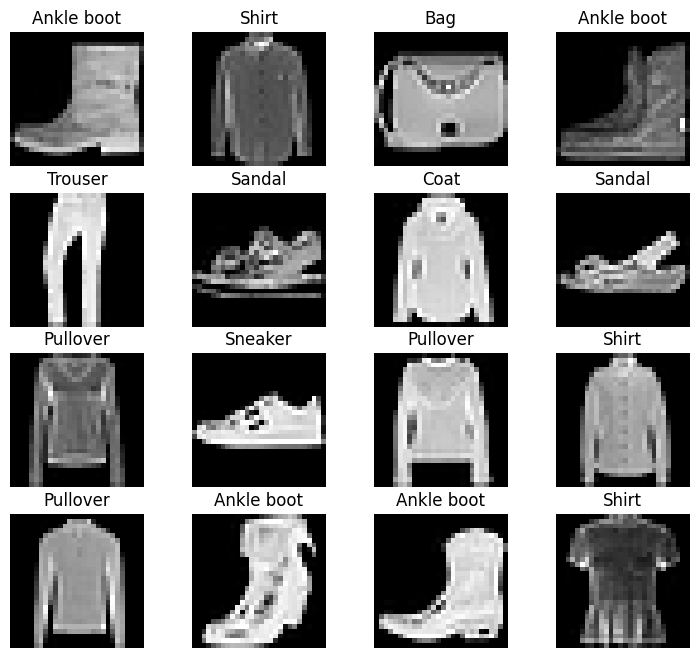

In [127]:
# plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,8))
rows,col=4,4
for i in range(1,rows*col+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(4,4,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis("off")
plt.show()



**Let's create DataLoader's for our training and test sets.**

In [128]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(train_data, # dataset to turn into iterable
                            batch_size=BATCH_SIZE,  # how many samples per batch?
                            shuffle=True)   # shuffle data every epoch?

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders:{train_dataloader,test_dataloader}")
print(f"length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7a7b238b9ed0>, <torch.utils.data.dataloader.DataLoader object at 0x7a7b23a4b690>)
length of train dataloader:1875 batches of 32
length of test dataloader:313 batches of 32


In [129]:
# Check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))


**And we can see that the data remains unchanged by checking a single sample**.

Image size: torch.Size([1, 28, 28])


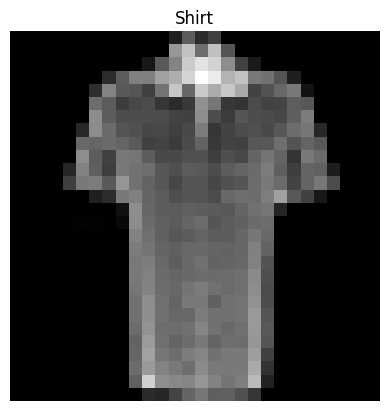

In [130]:
# show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,lavel=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f"Image size: {img.shape}")




#3. Model 0: Build a baseline model

A baseline model is one of the simplest models you can imagine.


You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.


Our baseline will consist of two nn.Linear() layers

Because we're working with image data, we're going to use a different layer to start things off.

And that's the nn.Flatten() layer.


nn.Flatten() compresses the dimensions of a tensor into a single vector.


In [131]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


**nn.Linear() layers like their inputs to be in the form of feature vectors.**

**Let's create our first model using nn.Flatten() as the first layer.**

In [132]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [133]:
torch.manual_seed(42)
# Need to set model with input parameters
model_0=FashionMNISTModelV0(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names))

model_0.to("cpu")


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# 3.1 Setup loss, optimizer and evaluation metrics

**creating an accurcay function**

In [134]:
def accuracy_fn(y_pred,y_true):
  y_pred=y_pred.argmax(dim=1)
  correct=(y_pred==y_true).sum().item()
  total=len(y_true)
  accuracy=(correct/total)*100  # converting into percentage
  return accuracy


**Setup loss function and optimizer**

In [135]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                                                    lr=0.1)


# 3.2 Creating a function to time our experiments

let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

Our timing function will import the timeit.default_timer() function from the Python timeit module.

In [136]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f}seconds")
  return total_time

# 3.3 Creating a training loop and training a model on batches of data

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.


Our data batches are contained within our DataLoaders, train_dataloader and test_dataloader for the training and test data splits respectively.


A batch is BATCH_SIZE samples of X (features) and y (labels), since we're using BATCH_SIZE=32, our batches have 32 samples of images and targets.


And since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.



This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

In [137]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and strat the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

# set the number of epoch(we'll keep this small for fatser training timr)
epochs=5

# create training and testing loops
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  ### training
  train_loss=0

  for batch,(x,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. forward pass'
    y_pred=model_0(x)

    # 2. calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss  # accumulatively add up the loss per epoch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print out how many samples have been seen
    if batch % 400==0:
      print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)}samples")

  # divide total train loss by length of train dataloader
  train_loss/=len(train_dataloader)

  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x,y in test_dataloader:
      # 1. forward pass
      test_pred=model_0(x)

      # 2. calculate the loss
      loss=loss_fn(test_pred,y)
      test_loss+=loss
      acc=accuracy_fn(y_true=y, y_pred=test_pred)
      test_acc+=acc

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)

    test_loss/=len(test_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)
   ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


# calculate the training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Epoch: 3
------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples

Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%

Epoch: 4
------
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples


# Make predictions and get Model 0 results

In [138]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      # make predictions with the model
      y_pred=model(x)

      # accumulate the loss and accuracy per values
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred)
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__, #only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}


In [139]:
# Calculate model 0 results on test dataset
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686938524246216,
 'model_acc': 83.2667731629393}

We can use this dictionary to compare the baseline model results to other models later on.

# 5. Setup device agnostic-code (for using a GPU if there is one)

In [140]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Model 1: Building a better model with non-**linearity**

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (nn.ReLU()) in between each linear layer.

In [141]:
# creating amodel with  non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_size,hidden_units,output_size):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), # flatten inputs into single vector
        nn.Linear(in_features=input_size,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_size),
        nn.ReLU(),
    )
  def forward(self,x):
    return self.layer_stack(x)


We'll need input_shape=784 (equal to the number of features of our image data), hidden_units=10 (starting small and the same as our baseline model) and output_shape=len(class_names) (one output unit per class).

In [142]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_size=784,hidden_units=10,output_size=len(class_names)).to(device)
next(model_1.parameters()).device # check model device

device(type='cpu')

# 6.1 Setup loss, optimizer and evaluation metrics

In [143]:
# creating a accuracy function
def accuracy_fn(y_true,y_pred):
  y_pred=y_pred.argmax(dim=1)
  correct=(y_true==y_pred).sum().item()
  total=len(y_true)
  return (correct/total)*100   # converting into percentage

In [144]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# Functionizing training and test loops


So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call .to(device) on our feature (X) and target (y) tensors.

For the training loop we'll create a function called train_step() which takes in a model, a DataLoader a loss function and an optimizer.

The testing loop will be similar but it'll be called test_step() and it'll take in a model, a DataLoader, a loss function and an evaluation function

In [145]:
def train_step(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    accuracy_fn,
    optimizer:torch.optim.Optimizer,
    device:torch.device=device
):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()
  for batch,(x,y) in enumerate(data_loader):
    # send data to GPU
    x,y=x.to(device),y.to(device)

    # 1. forward pass
    y_pred=model(x)

    # 2. calculate loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # calculate the average loss and accuracy per batch
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)

  # print what's happening
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")



In [146]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
      for x,y in data_loader:
        # send data to GPU
        x,y=x.to(device),y.to(device)

        # 1. forward pass
        test_pred=model(x)

        # 2. calculate loss
        test_loss+=loss_fn(test_pred,y)
        test_acc+=accuracy_fn(y_true=y,y_pred=test_pred)
      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


**Now we've got some functions for training and testing our model, let's run them.**

In [147]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
  test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch:1
-------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch:2
-------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 23.112seconds


**Let's evaluate our trained model_1 using our eval_model() function and see how it went**

In [148]:

torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

**Checking for model_0** (baseline model)

In [149]:

torch.manual_seed(42)

model_0_results = eval_model(model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686938524246216,
 'model_acc': 83.2667731629393}

**Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.**



That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.



And then the thing you thought might not work does.



It's part science, part art.



From the looks of things, it seems like our model is overfitting on the training data.



Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.



Two of the main ways to fix overfitting include:



Using a smaller or different model (some models fit certain kinds of data better than others).
Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).



---



# Model 2: Building a Convolutional Neural Network (CNN)



---



CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, depending on requirements.

In [150]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,  # how big is the square that's going over the image?
                  stride=1,  # default
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )
    self.block_2=nn.Sequential(
        nn.Conv2d(hidden_units,
                  hidden_units,
                  3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,hidden_units,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)

    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x


Let's instantiate our CNN Model

In [151]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

**To test the layers out, let's create some toy data just like the data used on CNN Explainer.**

In [152]:
torch.manual_seed(42)
# create sample batch of random numbers with same size as image data
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

**Let's create an example nn.Conv2d() with various parameters:**

- in_channels (int) - Number of channels in the input image.

- out_channels (int) - Number of
channels produced by the convolution.

- kernel_size (int or tuple) - Size of the convolving kernel/filter.

- stride (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.

- padding (int, tuple, str) - Padding added to all four sides of input. Default: 0.

In [153]:
torch.manual_seed(42)
# Create a convolutional layer with same dimensions as TinyVGG
conv_layer=nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)
conv_layer(test_image).shape

torch.Size([10, 62, 62])

**What if we changed the values of conv_layer?**

In [154]:
torch.manual_seed(42)
# Create a new conv_layer with different values
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)
conv_layer_2(test_image).shape

torch.Size([10, 30, 30])


**Check out the conv_layer_2 internal parameters**


In [155]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [156]:

# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} ")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) 


In [157]:
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer=nn.MaxPool2d(2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])



Notice the change in the shapes of what's happening in and out of a nn.MaxPool2d() layer.


The kernel_size of the nn.MaxPool2d() layer will affect the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

**Let's see this work with a smaller tensor.**

**What does MaxPooling do to my raw image (or tensor) if I give it a small patch of data?**

In [158]:
torch.manual_seed(42)
random_tensor=torch.randn(size=(1,2,2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape:\n{random_tensor.shape}")

# craete a max pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[0.3367, 0.1288],
         [0.2345, 0.2303]]])
Random tensor shape:
torch.Size([1, 2, 2])

Max pool tensor:
tensor([[[0.3367]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1])


Notice the final two dimensions between random_tensor and max_pool_tensor, they go from [2, 2] to [1, 1].

In essence, they get halved.

And the change would be different for different values of kernel_size for nn.MaxPool2d().

**essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**

This is the idea of the use of a nn.MaxPool2d() layer: take the maximum value from a portion of a tensor and disregard the rest.


In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

**Making a random tensor to check what does nn.AvgPool2d() do?**

In [159]:
torch.manual_seed(42)

random_ten=torch.randn(size=(32,1,28,28))

avg_pool_layer=nn.AvgPool2d(kernel_size=2)
pass_through=avg_pool_layer(random_ten)

print(f"Random tesor shape:\n{random_tensor.shape}")
print(f"Random tensor shape after passing through nn.AvgPool2d():\n{pass_through.shape}")

Random tesor shape:
torch.Size([1, 2, 2])
Random tensor shape after passing through nn.AvgPool2d():
torch.Size([32, 1, 14, 14])



# 7.3 Setup a loss function and optimizer for model_2

In [160]:
# set up loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

# training and testing model_2 using our training and test functions

In [161]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2=timer()

# train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(
      data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
               device=device)
  test_step(
      data_loader=test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.58653 | Train acc: 78.74%
Test loss: 0.39255 | Test accuracy: 86.04%

Epoch: 1
-----
Train loss: 0.36231 | Train acc: 86.89%
Test loss: 0.35723 | Test accuracy: 86.70%

Epoch: 2
-----
Train loss: 0.32485 | Train acc: 88.22%
Test loss: 0.32124 | Test accuracy: 88.02%

Train time on cpu: 120.871seconds


# Let's evaluate model_2's results with our eval_model() function.

In [162]:
# get model_2 results
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

**Let's combine our model results dictionaries into a DataFrame**

In [163]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.468694,83.266773
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321237,88.019169


 **We can add the training time values too.**

In [164]:
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.468694,83.266773,39.150015
1,FashionMNISTModelV1,0.685001,75.019968,23.111506
2,FashionMNISTModelV2,0.321237,88.019169,120.871438


It looks like our CNN (FashionMNISTModelV2) model performed the best (lowest loss, highest accuracy) but had the longest training time.


And our baseline model (FashionMNISTModelV0) performed better than model_1 (FashionMNISTModelV1).

Text(0.5, 0, 'accuracy')

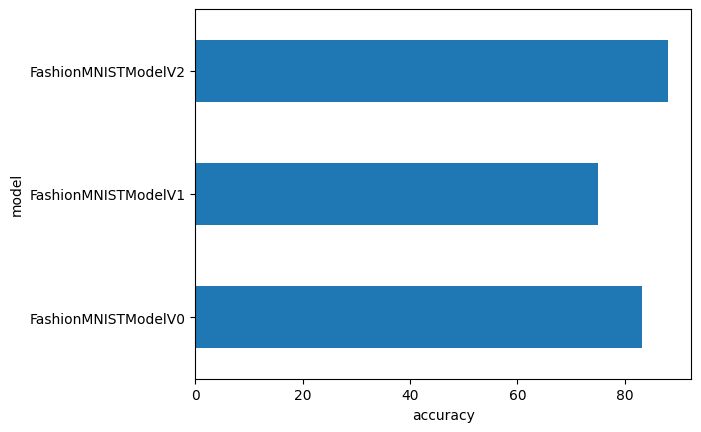

In [165]:
# visulize your results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.ylabel("model")
plt.xlabel("accuracy")

# Make and evaluate random predictions with best model

To do so, let's create a function make_predictions() where we can pass the model and some data for it to predict on.

In [166]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare sample
      sample=torch.unsqueeze(sample,dim=0).to(device)

      # forward pass
      pred_logits=model(sample)

      # get prediction probability
      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [167]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sampl label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sampl label: 5 (Sandal)


In [168]:
# make prediction on test samples with model 2
pred_probs=make_predictions(model=model_2,
                            data=test_samples,
                           device="cpu"

                           )
pred_probs[:2]

tensor([[1.7889e-07, 3.0100e-07, 7.4711e-08, 2.9112e-07, 4.0070e-08, 9.9988e-01,
         9.7217e-07, 1.5529e-05, 4.1133e-05, 6.1028e-05],
        [8.4885e-02, 5.9099e-01, 1.6154e-03, 1.5859e-01, 3.7294e-02, 1.3594e-04,
         1.2469e-01, 3.1763e-04, 1.2822e-03, 1.8921e-04]])

And now we can go from prediction probabilities to prediction labels by taking the torch.argmax() of the output of the torch.softmax() activation function.


In [169]:
# turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [170]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

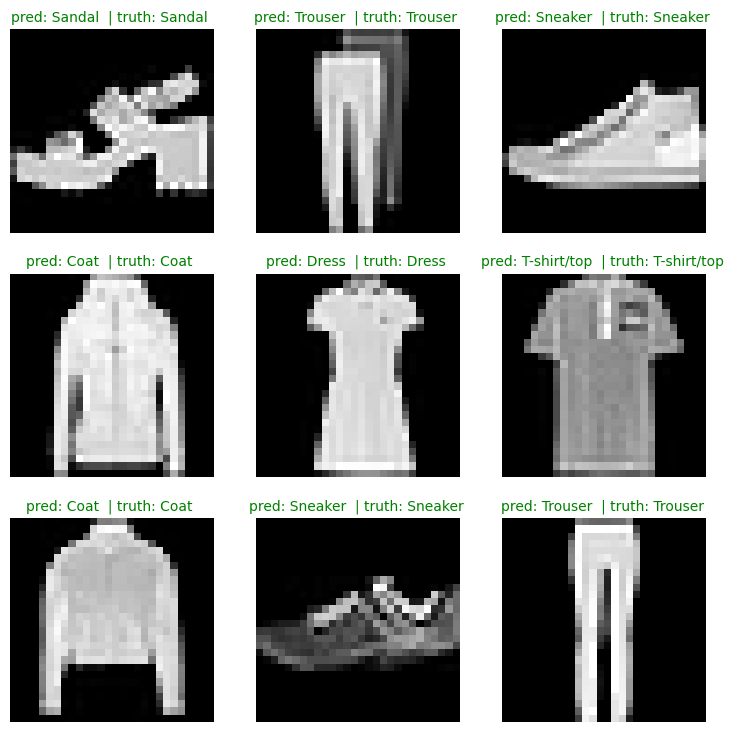

In [171]:
# plot predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))

ncol=3
nrows=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncol,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")

  # plot the prediction label
  pred_label=class_names[pred_classes[i]]

  # get the truth label
  truth_label=class_names[test_labels[i]]

  # create a title text of the plot
  title_text=f"pred: {pred_label}  | truth: {truth_label} "

  # check for equality and change title color accordingly
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)



# Making a confusion matrix for further prediction evaluation

To make a confusion matrix, we'll go through three steps:

* Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).

* Make a confusion matrix using torchmetrics.ConfusionMatrix.

* Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

Let's start by making predictions with our trained model.

In [175]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# amke predictions with train model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="making predictions"):
    # send data to the target device
    x,y=x.to(device),y.to(device)

    # do the forward pass
    y_logit=model_2(x)

    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred=torch.softmax(y_logit, dim=1).argmax(dim=1)

    # put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())
  # concatenate list of predictions into a tensor
  y_pred_tensor=torch.cat(y_preds)

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Now we've got predictions

 Make a confusion matrix using torchmetrics.ConfusionMatrix

In [176]:
# if torchmetrics exsts, if not ,install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
except ImportError:
  # if import fails then install them
  !pip install -q torchmetrics mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.4


torchmetrics and mlxtend installed, let's make a confusion matrix!

first we'll create a torchmetrics.ConfusionMatrix instance telling it how many classes we're dealing with by setting num_classes=len(class_names).

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (preds=y_pred_tensor) and targets (target=test_data.targets).

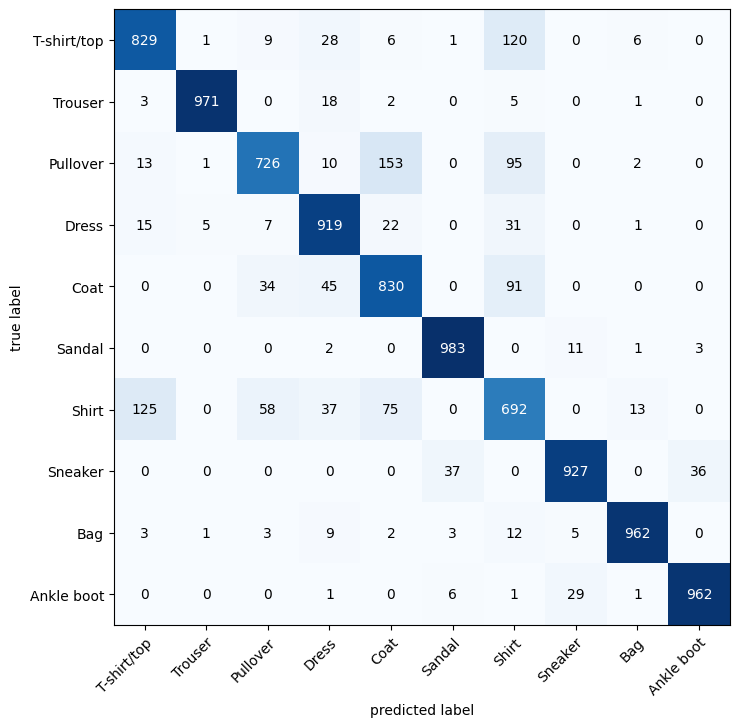

In [177]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup an instance of confusion matrix and compare predictions to target
confmat=ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

# plot the confusion matrix
fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    figsize=(10,8),
    class_names=class_names,

)



We can see our model does fairly well since most of the dark squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).


The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".


And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use where a model is getting things wrong.

It also hints at why the model may be getting certain things wrong.


It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".


We can use this kind of information to further inspect our models and data to see how it could be improved.

#  Save and load best performing model

For now, let's save our model_2's state_dict() then load it back in and evaluate it to make sure the save and load went correctly.

In [178]:
from pathlib import Path
# create model's directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save path
MODEL_NAME="pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# save the model state dict
print(f"saving model to:{ MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to:models/pytorch_computer_vision_model_2.pth
